# Funções para geração de resultados para algoritmo exaustivo

In [19]:
varia_filmes = [10, 15, 20, 25, 30]
varia_categorias = [2, 4, 8, 16]

!g++ -I/usr/local/Cellar/boost/1.75.0/include -L/usr/local/Cellar/boost/1.75.0/lib -lboost_random geradorInputs.cpp -o geradorInputs

for i in varia_filmes:
    for j in varia_categorias:
        !./geradorInputs {i} {j}
        !mv input.txt inputs_exaustiva/in-{i}-{j}.txt

In [31]:
# Gera outputs e mede tempo de execução
import time
import os

def get_files_in_directory(directory):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_list.append(file)
    return file_list

# Specify the directory path
directory_path = 'inputs_exaustiva'

# Call the function to get the list of files
files = get_files_in_directory(directory_path)

runtime_gpu = {}
runtime_openMP = {}
runtime_exhaustive = {}

amount_of_films_gpu = {}
amount_of_films_openMP = {}
amount_of_films_exhaustive = {}

for file in files:
    start_time = time.time()
    !./exaustiva_OpenMP inputs_exaustiva/{file} > outputs_exaustiva/out-openMP-{file}
    runtime_openMP[file] = time.time() - start_time
    with open(f"outputs_exaustiva/out-openMP-{file}") as f:
        first_line = f.readline().strip('\n')
        amount_of_films_openMP[file] = int(first_line.split(' ')[0])

for file in files:
    start_time = time.time()
    !./exaustiva inputs_exaustiva/{file} > outputs_exaustiva/out-exhaustive-{file}
    runtime_exhaustive[file] = time.time() - start_time
    with open(f"outputs_exaustiva/out-exhaustive-{file}") as f:
        first_line = f.readline().strip('\n')
        amount_of_films_exhaustive[file] = int(first_line.split(' ')[0])

for file in files:
    start_time = time.time()
    !./exaustiva_gpu inputs_exaustiva/{file} > outputs_exaustiva/out-gpu-{file}
    runtime_gpu[file] = time.time() - start_time
    with open(f"outputs_exaustiva/out-gpu-{file}") as f:
        first_line = f.readline().strip('\n')
        amount_of_films_gpu[file] = int(first_line.split(' ')[0])


In [32]:
# Gera arquivo csv com tempos de execução
import csv

with open('outputs_exaustiva/data_exaustiva.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['num_filmes','num_categorias', 'runtime_openMP', 'runtime_exhaustive', 'runtime_gpu', 'amount_of_films_openMP', 'amount_of_films_exhaustive', 'amount_of_films_gpu'])
    for input_value in runtime_openMP.keys():
        num_filmes = input_value.split('-')[1]
        num_categorias = input_value.split('-')[2].split('.')[0]
        writer.writerow([num_filmes, num_categorias, runtime_openMP[input_value], runtime_exhaustive[input_value], runtime_gpu[input_value], amount_of_films_openMP[input_value], amount_of_films_exhaustive[input_value], amount_of_films_gpu[input_value]])


In [1]:
import pandas as pd

output_files =  !ls outputs_exaustiva/
output_files = output_files[1:]
df = pd.read_csv("outputs_exaustiva/data_exaustiva.csv")

for file_name in output_files:
    file_info = file_name.split('.')[0].split('-')
    num_movies = int(file_info[3])
    num_categories = int(file_info[4])
    movie_screen_times = []
    if 'exhaustive' in file_name:
        with open(f'outputs_exaustiva/{file_name}', 'r') as f:
            lines = f.readlines()[1:] 
            for line in lines:
                movie_info = line.strip().split(' ')
                start_time = int(movie_info[0])
                end_time = int(movie_info[1])
                screen_time = end_time - start_time
                movie_screen_times.append(screen_time)
        
        row_index = df.index[(df['num_filmes'] == num_movies) & (df['num_categorias'] == num_categories)][0]
        df.loc[row_index, 'screen_time_exhaustive'] = sum(movie_screen_times)
    elif 'openMP' in file_name:
        with open(f'outputs_exaustiva/{file_name}', 'r') as f:
            lines = f.readlines()[1:] 
            for line in lines:
                movie_info = line.strip().split(' ')
                start_time = int(movie_info[0])
                end_time = int(movie_info[1])
                screen_time = end_time - start_time
                movie_screen_times.append(screen_time)
        
        row_index = df.index[(df['num_filmes'] == num_movies) & (df['num_categorias'] == num_categories)][0]
        df.loc[row_index, 'screen_time_openMP'] = sum(movie_screen_times)
    elif 'gpu' in file_name:
        with open(f'outputs_exaustiva/{file_name}', 'r') as f:
            lines = f.readlines()[1:] 
            for line in lines:
                movie_info = line.strip().split(' ')
                start_time = int(movie_info[0])
                end_time = int(movie_info[1])
                screen_time = end_time - start_time
                movie_screen_times.append(screen_time)
        
        row_index = df.index[(df['num_filmes'] == num_movies) & (df['num_categorias'] == num_categories)][0]
        df.loc[row_index, 'screen_time_gpu'] = sum(movie_screen_times)
        
df.to_csv('outputs_exaustiva/data_exaustiva.csv', index=False)

# Gráficos e Tabelas

In [2]:
# Tabela de tempo de execução
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.read_csv('outputs_exaustiva/data_exaustiva.csv')

df = df.set_index(['num_filmes', 'num_categorias'])

df_runtime = df[['runtime_openMP', 'runtime_exhaustive', 'runtime_gpu']]

df_runtime

runtime_openMP  runtime_exhaustive  runtime_gpu
num_filmes num_categorias                                                 
20         4                     0.303778            0.404273     1.206716
15         4                     0.105124            0.103641     0.103707
           8                     0.111444            0.103442     0.103127
25         4                     2.217392            3.414246     9.831869
15         2                     0.102963            0.104555     0.103526
           16                    0.103139            0.102947     0.103339
10         4                     0.103563            0.102894     0.103414
           16                    0.103342            0.103261     0.103260
25         16                    1.908716            2.510010     8.931819
           2                     5.255201            4.215404    15.750515
20         16                    0.203758            0.203224     0.705209
10         2                     0.104843            0.103021     0.104610
           8                     0.103277            0.102534     0.102848
25         8                     4.115440            5.722519    17.558173
30         8                    70.452951           78.237196   271.026753
           2                    18.368193           23.172558    86.475395
20         8                     0.105209            0.103452     0.203272
           2                     0.103193            0.103688     0.203318
30         16                  172.243049          209.544479   751.730687
           4                   314.914972          385.208896  1238.896859

In [3]:
# Tabela de quantidade de filmes
df_filmes = df[['amount_of_films_openMP', 'amount_of_films_exhaustive', 'amount_of_films_gpu']]
df_filmes

amount_of_films_openMP  amount_of_films_exhaustive  \
num_filmes num_categorias                                                       
20         4                                    7                           7   
15         4                                    5                           5   
           8                                    5                           5   
25         4                                    6                           6   
15         2                                    3                           3   
           16                                   6                           6   
10         4                                    3                           3   
           16                                   5                           5   
25         16                                   7                           7   
           2                                    3                           3   
20         16                                   7                           7   
10         2                                    4                           4   
           8                                    5                           5   
25         8                                    7                           7   
30         8                                    9                           9   
           2                                    3                           3   
20         8                                    6                           6   
           2                                    4                           4   
30         16                                   7                           7   
           4                                    7                           7   

                           amount_of_films_gpu  
num_filmes num_categorias                       
20         4                                 7  
15         4                                 5  
           8                                 5  
25         4                                 6  
15         2                                 3  
           16                                6  
10         4                                 3  
           16                                5  
25         16                                7  
           2                                 3  
20         16                                7  
10         2                                 4  
           8                                 5  
25         8                                 7  
30         8                                 9  
           2                                 3  
20         8                                 6  
           2                                 4  
30         16                                7  
           4                                 7

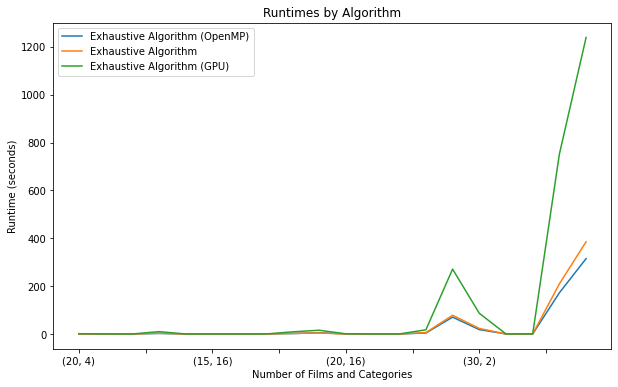

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
df_runtime['runtime_openMP'].plot(ax=ax, label='Exhaustive Algorithm (OpenMP)')
df_runtime['runtime_exhaustive'].plot(ax=ax, label='Exhaustive Algorithm')
df_runtime['runtime_gpu'].plot(ax=ax, label='Exhaustive Algorithm (GPU)')
ax.set_xlabel('Number of Films and Categories')
ax.set_ylabel('Runtime (seconds)')
ax.set_title('Runtimes by Algorithm')
ax.legend()
plt.show()